Simulated annealing basically emulates how nature finds the minimum energy state of a system as temperature drops.

We may use this algorithm to find the minimum (or the maximum) of a function stochastically. 

In [1]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
class SimulatedAnnealing:
    def __init__(self, func, dim , x0 ,  T0, k, IterationT, MinT, sigma, tol, Nstar):
        '''
        func: the function to be minimized
        dim: the number of arguments that func takes
        x0: starting point
        k: to be used for the temperature update
        IterationT: number of iterations per temperature
        MinT:  stop when the temperature becomes MinT
        sigma: new neighbours are found between x+-sigma/2
        tol,Nstar: SA Stops when |\Delta E |<tol for Nstar successive iterations
        '''
        
        self.func=func
        self.dim=dim
        self.x=x0
        self.T=T0
        self.k=k
        
        self.IterationT=IterationT
        self.MinT=MinT
        self.sigma=sigma
        self.tol=tol
        self.Nstar=Nstar
        
        self.E=self.func(x0)
            
    def nextT(self):
        '''Update the temperature'''
#         self.T=self.T/(1+k*self.T)
        self.T*=self.k
        
    def PickNeighbour(self):
        '''Pick a neighbour'''
#         return self.x+np.random.rand(dim)*sigma-sigma/2
        return self.x+np.random.normal(self.sigma,size=self.dim)#the normal seems to work nicely. 
            
    
    def BoltzmannP(self,Enew):
        '''Given a new value of the energy, return the Boltzmann factor'''
        return np.exp(-(Enew-self.E)/self.T)
    
    def runT(self):
        #use these to find the mean Delta E for a temperature 
        self.DE=0
        acc=0
        
        for _ in range(self.IterationT):
            xnew=self.PickNeighbour()
            Enew=self.func(xnew)
            
            
            if Enew<self.E or self.BoltzmannP(Enew) > np.random.rand():
                self.DE+=Enew
                acc+=1
                
                self.E=Enew
                self.x=xnew
                
        
        if acc==0:
            self.DE=0
        else:
            self.DE=np.abs(self.DE/acc-self.E) 
                
    def run(self, CList=False):
        '''
        Iterate until the temperature reaches MinT or until it reaches convergence
        CList=True stores E and IterConv values for all temperatures in self.ListIC and self.ListE
        '''
        
        
        IterConv=0
        
        if CList:
            self.ListIC=[]
            self.ListE=[]
            
        while self.T>self.MinT and self.Nstar>IterConv:
            self.runT()

            if self.DE<tol:
                IterConv+=1
            
            if self.DE>tol and IterConv>0:
                IterConv=0
            
            
            if CList:
                self.ListIC.append(IterConv)
                self.ListE.append(self.E)
            
            
            
            self.nextT()

        return self.x,self.E

                        

In [3]:
def f(x):
    return (x[0]-3)**4+(x[1]-1)**2+(x[2]+50)**2
#     return -(x[0]-1)**-2




In [4]:
dim=3
x0= [2,5,-1]
T0=np.abs(f(x0))+100# the temperature should be high enough to start in a nice hot position
k=0.99
IterationT=100
MinT=1e-50
sigma=1e-1
tol=1e-15
Nstar=1000


SA=SimulatedAnnealing(f, dim , x0 ,  T0, k, IterationT, MinT,sigma,tol,Nstar)

print(SA.run(True),
      '\n\n',
       SA.T,SA.E)

(array([  2.9385386 ,   0.99109609, -49.99501181]), 0.00011843115489616473) 

 2.1886649000423503e-07 0.00011843115489616473


<IPython.core.display.Javascript object>


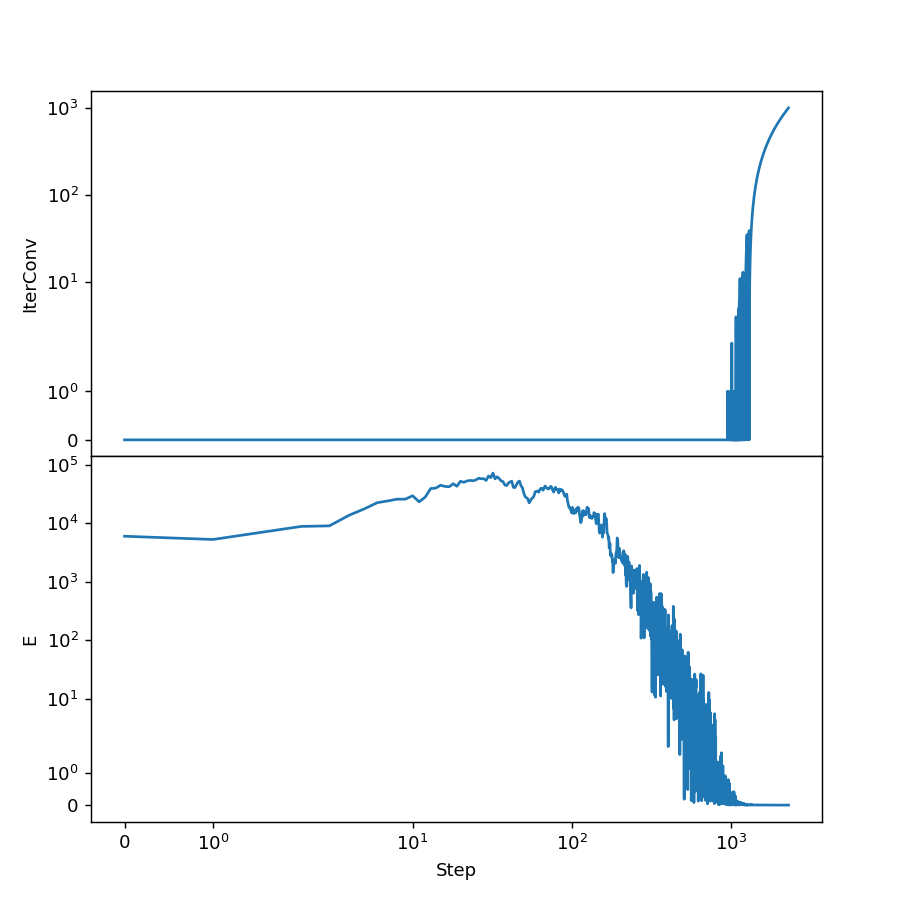

In [5]:
fig=plt.figure(figsize=(7,7))
fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.plot(SA.ListIC)

sub.set_xscale('symlog')
sub.set_yscale('symlog')
sub.set_ylabel('IterConv')



sub = fig.add_subplot(212)
sub.plot(SA.ListE)

sub.set_xscale('symlog')
sub.set_yscale('symlog')



sub.set_xlabel('Step')
sub.set_ylabel('E')


plt.show()